**Import datasets module from tensorflow.keras**

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [2]:
# Convert the pixel values to float32 and normalize to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Verify the normalization
print(f"Training images range: {train_images.min()} to {train_images.max()}")
print(f"Test images range: {test_images.min()} to {test_images.max()}")

# Confirm the data loading process
print(f"Training data shape: {train_images.shape}, Training labels shape: {train_labels.shape}")
print(f"Test data shape: {test_images.shape}, Test labels shape: {test_labels.shape}")

Training images range: 0.0 to 1.0
Test images range: 0.0 to 1.0
Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)


**Inspect the dataset**

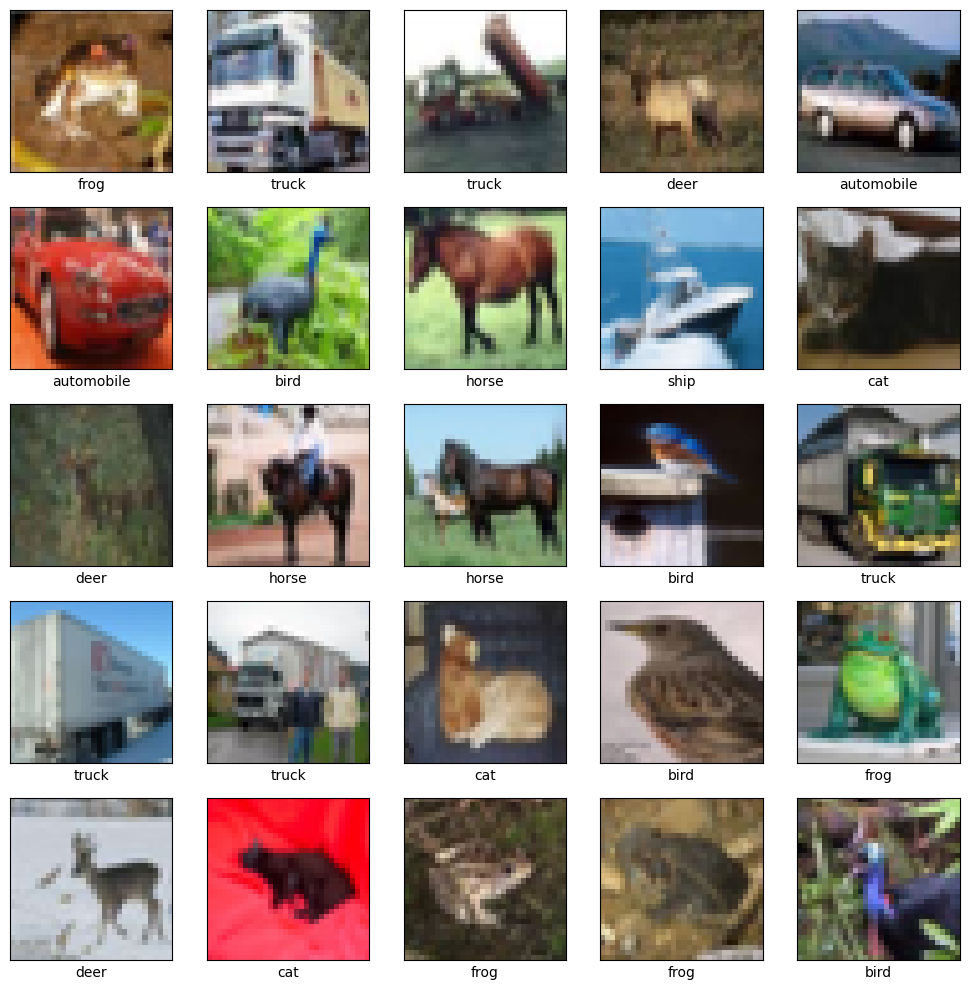

In [3]:
# Class names corresponding to the dataset labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create a figure for the plot
plt.figure(figsize=(10, 10))

# Loop through the first 25 images
for i in range(25):
    plt.subplot(5, 5, i + 1)  # Create a 5x5 grid and position the image
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)  # Remove gridlines
    plt.imshow(train_images[i])  # Display the image
    # Display the class name corresponding to the label
    plt.xlabel(class_names[train_labels[i][0]])

# Show the plot
plt.tight_layout()
plt.show()

**Create convolutional layer**

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Define a sequential model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=32,                # Number of output filters
                 kernel_size=(3, 3),        # Dimensions of the filter
                 activation='relu',         # Activation function
                 input_shape=(32, 32, 3)))  # Input shape for CIFAR-10 images

# Display the model summary to confirm the layer configuration
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

**Add dense layers**

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a sequential model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=32,                # Number of output filters
                 kernel_size=(3, 3),        # Dimensions of the filter
                 activation='relu',         # Activation function
                 input_shape=(32, 32, 3)))  # Input shape for CIFAR-10 images

# Add a Flatten layer
model.add(Flatten())

# Add a Dense layer with 64 units and ReLU activation
model.add(Dense(units=64, activation='relu'))

# Print the model's architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,843,264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,844,160 (7.03 MB)

 Trainable params: 1,844,160 (7.03 MB)

 Non-trainable params: 0 (0.00 B)

**Add another dense layer**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Define a sequential model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a Flatten layer
model.add(Flatten())

# Add a Dense layer with 64 units and ReLU activation
model.add(Dense(units=64, activation='relu'))

# Add an output Dense layer with 10 units (one for each class)
model.add(Dense(units=10))  # No activation since logits will be used with the loss function

# Compile the model
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Display the model's architecture
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │       1,843,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,844,810 (7.04 MB)

 Trainable params: 1,844,810 (7.04 MB)

 Non-trainable params: 0 (0.00 B)

**Train the model**

In [7]:
# Train the model
history = model.fit(
    train_images,                # Training images
    train_labels,                # Training labels
    epochs=20,                   # Number of epochs
    validation_data=(test_images, test_labels)  # Validation data
)

# Display a summary of the training process
print("\nTraining Complete")


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.3929 - loss: 1.6821 - val_accuracy: 0.5267 - val_loss: 1.3276
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.5792 - loss: 1.1980 - val_accuracy: 0.5677 - val_loss: 1.2305
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.6318 - loss: 1.0384 - val_accuracy: 0.5815 - val_loss: 1.1931
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.6790 - loss: 0.9295 - val_accuracy: 0.5936 - val_loss: 1.1995
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.7089 - loss: 0.8311 - val_accuracy: 0.5789 - val_loss: 1.2698
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7462 - loss: 0.7314 - val_accuracy: 0.5869 - val_loss: 1.2839
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7745 - loss: 0.6542 - val_accuracy: 0.5959 - val_loss: 1.3088
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.8021 -

**Evaluate the model**

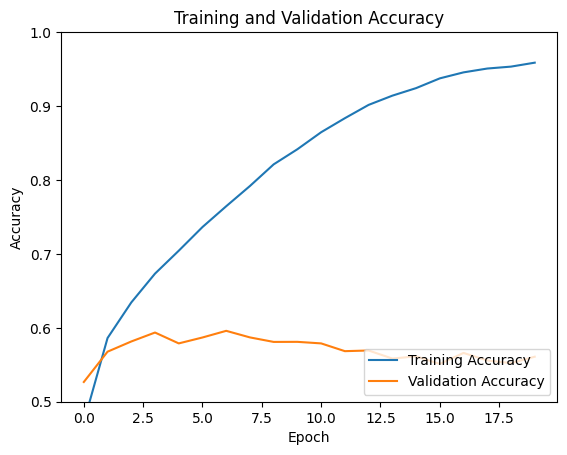

313/313 - 3s - 8ms/step - accuracy: 0.5609 - loss: 3.0109
Test Loss: 3.0109
Test Accuracy: 0.5609


In [8]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Label axes and set limits
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])  # Set y-axis limits
plt.legend(loc='lower right')  # Add legend
plt.title('Training and Validation Accuracy')
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

# Display test set evaluation results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
